# One Dimensional Fermi Hubbard Model with QuTiP: Introduction

Saumya Biswas (sbiswas4@umd.edu)

For more information about QuTiP see [http://qutip.org](http://qutip.org)

We introduce the basic functionality of QuTiPs Lattice1d class of the lattice module.

# About

The qutip.lattice module enables defining tight binding/lattice models for bosons and fermions on lattices and calculating their fundamental properties specially features arising from the translational symmetry of the lattice. The lattice classes defined are compatible with the rest of the functionalities of QuTiP and can make use of them quite conveniently.

## Multiparticle physics

Lattice1d_f_Hubbard class deals with multi-particle physics of spin-$1/2$ electrons with the Fermi Hubbard model.

![title](images/latt_1.png)

## The Fermi-Hubbard model
Defining an instance of the Lattice1d class requires formatting the second Quantized Hamiltonian in a unitcell based structure with nearest neighbor coupling only. Howewver, the functionality is limited to single particle physics only in Lattice1d class methods.

\begin{eqnarray}
H = \sum_{j, \sigma} (\epsilon - \mu) c_{j,\sigma}^{\dagger} c_{j,\sigma} + \sum_{\langle j,k \rangle,\sigma} t_{j,k} c_{j,\sigma}^{\dagger} c_{k,\sigma} + U\sum_j c_{j,\uparrow}^{\dagger} c_{j,\downarrow}^{\dagger} c_{j,\downarrow} c_{j,\uparrow}  \label{eq:FermiHubbard} 
\end{eqnarray}

where $c_i$ is the fermionic annihilation operator, $t_{j,k}$ is the nearest neighbour hopping. 

The Lattice1d_f_Hubbard class defines a 1d Fermi Hubbard model with nearest neighbor hopping t and interaction strength U.

## How to Define a One Dimensional Fermi Hubbard Model

In [28]:
from qutip import (Qobj, tensor, basis, qeye, isherm, sigmax, sigmay, sigmaz, sigmam, sigmap, num,
                   create, destroy, mesolve, Options)
from qutip_lattice import *
import matplotlib.pyplot as plt
import numpy as np

## Problems with a given symmetry

The definition of the lattice requires the number of sites, periodicity, values for t and U. The dynamics problem can be solved on a basis with a chosen symmetry.

# Translational and particle number symmetric basis

In [29]:
nSites = 9
fermiHubbardLattice = Lattice1d_fermi_Hubbard( num_sites=nSites, boundary="periodic", t=1, U=-4, V=1)
[Hamiltonian_Nk, basisReprUp, DownStatesPerRepr, normHubbardStates] = fermiHubbardLattice.Hamiltonian( fillingUp=3, fillingDown=3, kval=0)

All the operators computed are in the chosen basis with number and translational symmetry labeled by number and k-value.

In [30]:
Hamiltonian_Nk

Quantum object: dims = [[786], [786]], shape = (786, 786), type = oper, isherm = True
Qobj data =
[[-4.         -1.          0.         ...  0.          0.
   0.        ]
 [-1.         -1.         -1.         ...  0.          0.
   0.        ]
 [ 0.         -1.         -3.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  2.         -2.
   0.        ]
 [ 0.          0.          0.         ... -2.          4.
  -1.73205081]
 [ 0.          0.          0.         ...  0.         -1.73205081
   6.        ]]

## The basis of the Hamiltonian

In [31]:
basisReprUp

array([[0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1.]])

In [32]:
DownStatesPerRepr

{0: array([[0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 1.],
        [0., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1., 0., 1., 0.],
        [0., 0., 0., 1., 0., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 1., 0., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 1., 1.],
        [0., 0., 1., 0., 0., 0.

##  Combined basis from Spin-up and Spin-down electrons 

The number of rows in basisReprUp denotes the number of spin-up bases and each row is appended with each rows of the corresponding matrix in DownStatesPerRepr for a basis vector with approved k-value.

In [33]:
[basisReprUp[0],DownStatesPerRepr[0]]

[array([0., 0., 0., 0., 0., 0., 1., 1., 1.]),
 array([[0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 1.],
        [0., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1., 0., 1., 0.],
        [0., 0., 0., 1., 0., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 1., 0., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0

## Eigenenergies of the Hamiltonian in the $| n, k \rangle $ basis

In [34]:
E_HNk = Hamiltonian_Nk.eigenenergies(sparse=True, sort='low', eigvals=20, tol=0, maxiter=100000)

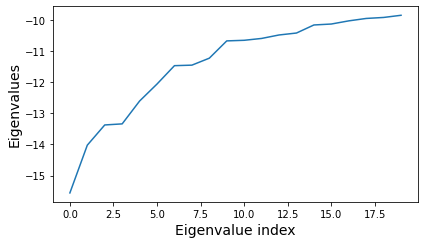

In [35]:
iddx = np.arange(np.shape(E_HNk)[0])
plt.rcParams["figure.figsize"] = [6, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(iddx, E_HNk)
plt.xlabel('Eigenvalue index', fontsize=14)
plt.ylabel(r'Eigenvalues', fontsize=14)
#plt.ylim([-1e-8, 1e-8])
plt.show()
plt.close()

## Let's do the same plot as a stem plot!

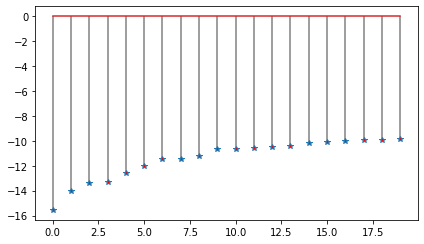

In [36]:
plt.rcParams["figure.figsize"] = [6, 3.50]
plt.rcParams["figure.autolayout"] = True

markerline, stemlines, baseline = plt.stem(iddx, E_HNk, linefmt='grey', markerfmt='*', bottom=0)

markerline.set_markerfacecolor('red')

plt.show()

#  Why are there two eigenvalues below the 'gap'? I expected the gap between the ground state and the first excited state!

## Particle Number only basis

In [37]:
[Hamiltonian_N, basisStatesUp, basisStatesDown, normHubbardStates] = fermiHubbardLattice.Hamiltonian( fillingUp=3, fillingDown=3)

Setting any argument to None gives a basis does not make use of that symmetry.

In [38]:
Hamiltonian_N

Quantum object: dims = [[7056], [7056]], shape = (7056, 7056), type = oper, isherm = True
Qobj data =
[[-4. -1.  0. ...  0.  0.  0.]
 [-1. -1. -1. ...  0.  0.  0.]
 [ 0. -1. -3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -3. -1.  0.]
 [ 0.  0.  0. ... -1. -1. -1.]
 [ 0.  0.  0. ...  0. -1. -4.]]

## The basis of the Hamiltonian

In [39]:
basisStatesUp

array([[0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0.

In [40]:
basisStatesDown

array([[0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0.

## Eigenenergies of the Hamiltonian in the $| N\rangle $ basis

In [41]:
E_HN = Hamiltonian_N.eigenenergies(sparse=True, sort='low', eigvals=40, tol=0, maxiter=100000)

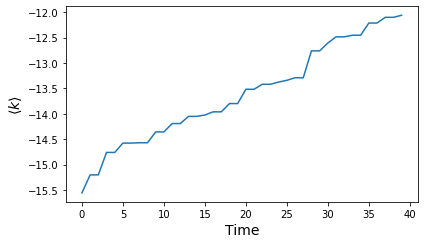

In [42]:
idxN = np.arange(np.shape(E_HN)[0])
plt.rcParams["figure.figsize"] = [6, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(idxN, E_HN)
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\langle k \rangle$', fontsize=14)
#plt.ylim([-1e-8, 1e-8])
plt.show()
plt.close()

## Let's do the same plot as a stem plot!

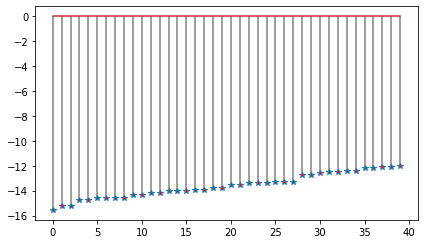

In [43]:
plt.rcParams["figure.figsize"] = [6, 3.50]
plt.rcParams["figure.autolayout"] = True

markerline, stemlines, baseline = plt.stem(idxN, E_HN, linefmt='grey', markerfmt='*', bottom=0)

markerline.set_markerfacecolor('red')

plt.show()

In [44]:
ES = Hamiltonian_N.eigenstates(sparse=True, sort='low', eigvals=20, tol=0, maxiter=100000)
GS = Qobj(ES[1][6])

In [45]:
Mds = GS.dag() * GS

In [46]:
mods = np.sqrt( Mds[0,0])

In [47]:
GS = GS / mods

In [48]:
GS

Quantum object: dims = [[7056], [1]], shape = (7056, 1), type = ket
Qobj data =
[[ 0.0003091 -3.59051357e-05j]
 [ 0.00085815-1.80799051e-04j]
 [ 0.00022803-1.17360689e-04j]
 ...
 [-0.00045452+2.93207735e-04j]
 [-0.00078961+7.94003071e-04j]
 [-0.00028231+3.14763083e-04j]]

In [49]:
basisStatesDown

array([[0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0.

In [50]:
niu = np.zeros((nSites), dtype=complex)
nid = np.zeros((nSites), dtype=complex)

for i in range(nSites):
    ni_op = n_i(i, basisStatesUp, basisStatesDown)
    riu = GS.dag() * ni_op[0] * GS
    niu[i] = riu[0][0]
    rid = GS.dag() * ni_op[1] * GS
    nid[i] = rid[0][0]    

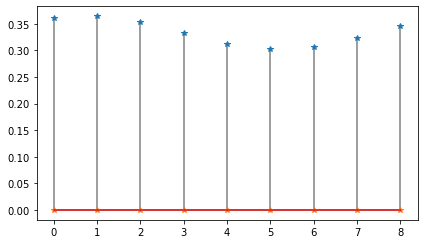

In [51]:
x = np.arange(nSites)

plt.rcParams["figure.figsize"] = [6, 3.50]
plt.rcParams["figure.autolayout"] = True

markerline, stemlines, baseline = plt.stem(x, np.real(niu), linefmt='grey', markerfmt='*', bottom=0)
markerline, stemlines, baseline = plt.stem(x, np.imag(niu), linefmt='grey', markerfmt='*', bottom=0)

markerline.set_markerfacecolor('red')

plt.show()

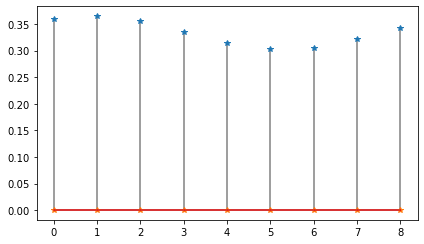

In [52]:
x = np.arange(nSites)

plt.rcParams["figure.figsize"] = [6, 3.50]
plt.rcParams["figure.autolayout"] = True

markerline, stemlines, baseline = plt.stem(x, np.real(nid), linefmt='grey', markerfmt='*', bottom=0)
markerline, stemlines, baseline = plt.stem(x, np.imag(nid), linefmt='grey', markerfmt='*', bottom=0)

markerline.set_markerfacecolor('red')

plt.show()

### References
[1] J. R. Johansson, P. D. Nation, and F. Nori, Comp. Phys. Comm. 183, 1760 (2012). http://qutip.org 

[2] Han, JungYun, Clemens Gneiting, and Daniel Leykam. "Helical transport in coupled resonator waveguides." Physical Review B 99.22 (2019): 224201.
https://journals.aps.org/prb/abstract/10.1103/PhysRevB.99.224201#

In [53]:
import qutip
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li and Jake Lishman.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.5.3
Numpy Version:      1.17.0
Scipy Version:      1.5.3
Cython Version:     0.29.24
Matplotlib Version: 3.3.4
Python Version:     3.6.13
Number of CPUs:     4
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/saumya/anaconda3/envs/qlat_dev2/lib/python3.6/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `quti

In [67]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
